# Blackjack

_El código siguiente simula cierto número de manos de dos cartas y devuelve la proporción de blackjacks obtenida._

Comenzamos definiendo algunos objetos para representar las cartas y baraja, que está compuesta por cuatro mazos tradicionales.

In [26]:
rm(list=ls()) # Limpia el espacio de trabajo de R
cartas <- c('A','K','Q','J','10',
            '9','8','7','6','5',
            '4','3','2') # Trece cartas por figura (digamos tréboles)
baraja <- c(cartas,cartas,cartas,cartas) # Cuatro figuras por bajara (tréboles, corazones, diamantes, espadas)
super_baraja <- c(baraja,baraja,baraja,baraja) # Cuatro barajas mezcladas

Podemos verificar algunas características de estos objetos: sabemos que debe haber 13 cartas de cada figura, 52 por baraja, y 208 en total.

In [15]:
length(cartas)

[1] 13

In [16]:
length(baraja)

[1] 52

In [17]:
length(super_baraja)

[1] 208

Además, la súper baraja debe terminar con dieciséis Ases, deciséis Reyes, etc.

In [18]:
sum(super_baraja=='A')

[1] 16

In [19]:
sum(super_baraja=='K')

[1] 16

Y como es un objeto relativamente pequeño, se puede imprimir completo en la consola:

In [20]:
super_baraja

[1] "A"  "K"  "Q"  "J"  "10" "9"  "8"  "7"  "6"  "5"  "4"  "3"  "2"  "A"  "K" 
 [16] "Q"  "J"  "10" "9"  "8"  "7"  "6"  "5"  "4"  "3"  "2"  "A"  "K"  "Q"  "J" 
 [31] "10" "9"  "8"  "7"  "6"  "5"  "4"  "3"  "2"  "A"  "K"  "Q"  "J"  "10" "9" 
 [46] "8"  "7"  "6"  "5"  "4"  "3"  "2"  "A"  "K"  "Q"  "J"  "10" "9"  "8"  "7" 
 [61] "6"  "5"  "4"  "3"  "2"  "A"  "K"  "Q"  "J"  "10" "9"  "8"  "7"  "6"  "5" 
 [76] "4"  "3"  "2"  "A"  "K"  "Q"  "J"  "10" "9"  "8"  "7"  "6"  "5"  "4"  "3" 
 [91] "2"  "A"  "K"  "Q"  "J"  "10" "9"  "8"  "7"  "6"  "5"  "4"  "3"  "2"  "A" 
[106] "K"  "Q"  "J"  "10" "9"  "8"  "7"  "6"  "5"  "4"  "3"  "2"  "A"  "K"  "Q" 
[121] "J"  "10" "9"  "8"  "7"  "6"  "5"  "4"  "3"  "2"  "A"  "K"  "Q"  "J"  "10"
[136] "9"  "8"  "7"  "6"  "5"  "4"  "3"  "2"  "A"  "K"  "Q"  "J"  "10" "9"  "8" 
[151] "7"  "6"  "5"  "4"  "3"  "2"  "A"  "K"  "Q"  "J"  "10" "9"  "8"  "7"  "6" 
[166] "5"  "4"  "3"  "2"  "A"  "K"  "Q"  "J"  "10" "9"  "8"  "7"  "6"  "5"  "4" 
[181] "3"  "2"  "A"  "K"  "Q"  "J"  "10" "9"  "8"  "7"  "6"  "5"  "4"  "3"  "2" 
[196] "A"  "K"  "Q"  "J"  "10" "9"  "8"  "7"  "6"  "5"  "4"  "3"  "2"

Hay varias maneras de simular extracciones de este objeto y examinar la cantidad de blackjacks en ellas. En la siguiente, primero se define una función que simula una extracción de dos cartas, y después esa función se ejecuta varias veces registrando el número de blackjacks acumulados.

In [27]:
simulate_hand <-  function(){
  # Esta función simula una extracción de dos cartas de la súper baraja (SB)
    
  # Primera carta:
  indice_primera <- sample(1:length(super_baraja), # Extrae al azar un entero entre 1 y la longitud de la SB 
                           size=1, # (también se puede extraer más de un elemento) 
                           replace=F) # Con/sin reemplazo (irrelevante cuando size=1)
  first_card <- super_baraja[indice_primera] # Extrae la primera carta...
  super_after_first <- super_baraja[-indice_primera] # ...sácala de la súper baraja...
  # Segunda carta:
  indice_segunda <- sample(1:length(super_after_first), # ...y extrae otra posición de la baraja recortada.
                           size=1,
                           replace=F)
  second_card <- super_after_first[indice_segunda] # Extrae segunda carta.
  
  # Mano
  hand <- c(first_card,second_card)
    return(hand)
}

Al ejecutar el código anterior únicamente se define la función, pero no se ejecuta. Para ver si funciona se puede correr directamente en la consola:

In [22]:
simulate_hand()

[1] "10" "2"

In [23]:
simulate_hand()

[1] "8"  "10"

Desde luego cada resultado es diferente porque las extracciones son aleatorias. Es importante mencionar que la ejecución de una función en `R` generalmente no cambia los objetos en el espacio de trabajo. En este caso, el más importante, la `super_baraja`, conserva sus 208 elementos originales incluso después de correr la función varias veces (y de hecho el objeto `super_after_first`, definido _dentro_ de la función, ni siquiera existe en el espacio de `R`).

In [24]:
length(super_baraja)

[1] 208

In [25]:
super_after_first

ERROR: Error in eval(expr, envir, enclos): objeto 'super_after_first' no encontrado


Para evaluar si en cada simulación tenemos un blackjack es conveniente escribir las comparaciones condicionales sobre un objetos fijos que tengan la misma estructura que la salida de la función, con el fin de cambiarlos intencionalmente y asegurarnos de que las comparaciones devuelven los resultados correctos. Por ejemplo, para preguntar cuáles elementos de cada mano son un As:

In [ ]:
hand <- c('Q','A')
hand=='A'
hand <- c('A','A')
hand=='A'
hand <- c('A','7')
hand=='A'
hand <- c('5','10')
hand=='A'

Los objetos de tipo lógico como estos permiten ciertas operaciones aritméticas. Por ejemplo, para contar cuántos Ases tiene una mano:

In [ ]:
hand <- c('Q','A')
sum(hand=='A')
hand <- c('A','A')
sum(hand=='A')
hand <- c('A','7')
sum(hand=='A')
hand <- c('5','10')
sum(hand=='A')

Y para preguntar si cierta mano tiene únicamente *un* As:

In [ ]:
hand <- c('Q','A')
sum(hand=='A')==1
hand <- c('A','A')
sum(hand=='A')==1
hand <- c('A','7')
sum(hand=='A')==1
hand <- c('5','10')
sum(hand=='A')==1

Otras comparaciones lógicas en `R` permiten preguntar si cada elemento de cierto objeto también se encuentra en otro. En este caso, para preguntar si cada carta se encuentra dentro de las figuras y dieces:

In [ ]:
hand <- c('Q','A')
hand%in%c('K','Q','J','10')
hand <- c('A','A')
hand%in%c('K','Q','J','10')
hand <- c('A','7')
hand%in%c('K','Q','J','10')
hand <- c('5','10')
hand%in%c('K','Q','J','10')
hand <- c('J','K')
hand%in%c('K','Q','J','10')

Y para preguntar cuántas cartas en cierta mano también pertenecen al otro conjunto:

In [ ]:
hand <- c('Q','A')
sum(hand%in%c('K','Q','J','10'))
hand <- c('A','A')
sum(hand%in%c('K','Q','J','10'))
hand <- c('A','7')
sum(hand%in%c('K','Q','J','10'))
hand <- c('5','10')
sum(hand%in%c('K','Q','J','10'))
hand <- c('J','K')
sum(hand%in%c('K','Q','J','10'))

Finalmente, para preguntar si *una y sólo una* carta de la mano se encuentra entre los dieces y las figuras:

In [ ]:
hand <- c('Q','A')
sum(hand%in%c('K','Q','J','10'))==1
hand <- c('A','A')
sum(hand%in%c('K','Q','J','10'))==1
hand <- c('A','7')
sum(hand%in%c('K','Q','J','10'))==1
hand <- c('5','10')
sum(hand%in%c('K','Q','J','10'))==1
hand <- c('J','K')
sum(hand%in%c('K','Q','J','10'))==1

Sabemos que ambas condiciones, `sum(hand=='A')==1` y `sum(hand%in%c('K','Q','J','10'))==1`, tienen que ser ciertas (y bastan) para que una mano sea blackjack. Para preguntarlas al mismo tiempo se utiliza la conjunción `&`:

In [ ]:
hand <- c('Q','A')
sum(hand=='A')==1&sum(hand%in%c('K','Q','J','10'))==1
hand <- c('A','A')
sum(hand=='A')==1&sum(hand%in%c('K','Q','J','10'))==1
hand <- c('A','7')
sum(hand=='A')==1&sum(hand%in%c('K','Q','J','10'))==1
hand <- c('5','10')
sum(hand=='A')==1&sum(hand%in%c('K','Q','J','10'))==1
hand <- c('J','K')
sum(hand=='A')==1&sum(hand%in%c('K','Q','J','10'))==1

Con lo cual comprobamos que la pregunta `sum(hand=='A')==1&sum(hand%in%c('K','Q','J','10'))==1` identifica blackjacks correctamente. Podemos utilizarla sobre la salida de la función que simula manos porque dicha salida devuelve un objeto con la misma estructura que `hand`:

In [ ]:
hand <- simulate_hand()
print(hand)
sum(hand=='A')==1&sum(hand%in%c('K','Q','J','10'))==1

Las líneas siguientes repiten estas instrucciones varias veces, registrando el número de blackjacks obtenidos.

In [ ]:
n_hands <- 10000 # Número de manos a simular
n_blckjck <- 0 # Contador de blackjacks en 'n_hands' manos
for(i in 1:n_hands){ # Repite las instrucciones siguientes para cada elemento 'i' del vector '1:n_hands':
    
  # a. En cada iteración simula una mano (de dos cartas)
  hand <- simulate_hand()
  # b. y pregunta si es blackjack.  
  if(sum(hand=='A')==1&sum(hand%in%c('K','Q','J','10'))==1){
     # b1. En caso de que la mano sea blackjack
        n_blckjck <- n_blckjck+1 # Agrega uno al conteo total de blckjcks.
  }
    
}

Examinando el número de manos, el total de blackjacks registrados, y calculando la proporción entre ellos:

In [ ]:
print(n_hands)
print(n_blckjck)
print(n_blckjck/n_hands)

En otras palabras, la célula de código anterior simula una noche en el casino compuesta por varias manos. Cada vez que se ejecutan el conteo de blackjacks obtenidos es diferente porque cada mano se extrae al azar. Para examinar la dispersión de dichos conteos a través de varias _noches en el casino_, es conveniente 1. guardar las instrucciones de arriba en una función para 2. ejecutarlas varias veces (por ejemplo para simular un año de visitas al casino) con código más compacto y mejor legible.

Definiendo la función y corriéndola un par de veces:

In [28]:
casino_night <- function(n_hands){
    # Esta función simula una noche en el casino en la que se observan 'n_hands' manos
    
    # Noten que 'n_hands' ya no se define dentro de la función,
    # y en cambio pasa como un argumento.
    
    n_blckjck <- 0 # Contador de blackjacks en 'n_hands' manos
    for(i in 1:n_hands){ # Repite las siguientes instrucciones para cada elemento 'i' del vector '1:n_hands':
    
        # a. En cada iteración simula una mano (de dos cartas)
        hand <- simulate_hand()
        # b. y pregunta si es blackjack.  
        if(sum(hand=='A')==1&sum(hand%in%c('K','Q','J','10'))==1){ # En caso de que la mano sea blackjack:
        # b1. Agrega uno al conteo total de blckjcks.
            n_blckjck <- n_blckjck+1
        }
    }
    return(n_blckjck/n_hands) # La función devuelve la prpoporción de blackjacks.
}

In [ ]:
casino_night(10000)

In [ ]:
casino_night(10000)

Cada ejecución de la función simula una noche compuesta por 10000 manos (aunque ese número puede cambiarse a voluntad). Para simular las 365 de un año:

In [ ]:
nights <- NULL # Este objeto guardará la proporción de blckjcks registrada cada noche
for(d in 1:365){
    nights[d] <- casino_night(10000) # Suponiendo que la cantidad de manos por noche es constante
}

Ahora el vector `nights` contiene la proporción de blackjacks obtenida en cada noche de apuestas. Podemos examinar su contenido directamente en la consola y explorar la distribución de proporciones de manera visual construyendo un histograma. En la gráfica, la línea azul en x=0.0475 señala la solución teórica del problema.

In [ ]:
nights

In [ ]:
hist(nights,xlim=c(0,0.1),breaks=seq(0,1,length.out = 800),col='#ee000088')
abline(v=0.0475,col='#0000eeaa',lwd=4)

**Ejercicios:**

-Modifica el código para simular qué ocurre si sabemos que, antes de simular la primera mano, cuatro cartas que no son Ases ni Figuras ni Dieces ya fueron extraídas de la súper baraja.  

-Modifica el código para simular que cada noche se juegan 1000 manos, en lugar de 10000. ¿Esperas algún cambio en el histograma final? Describe qué cambia y qué no, y explica esos resultados.

-El programa actual simula la misma cantidad de manos por noche. ¿Cómo cambiarías el código para simular una persona que comienza jugando pocas manos por noche, pero que aumenta ese número conforme avanza el año? Escribe tus modificaciones y discute los resultados.

-(Opcional) la función `simulate_hand()` actualmente simula manos de dos cartas, pero una mano en un juego real puede contener más de dos. Modifica dicha función para que extraiga tantas cartas de la súper baraja como solicite el usuario, y cambia los condicionales necesarios para evaluar si cada mano de varias cartas suma menos de 21, 21 exactos, o se pasa de 21. 


**Soluciones:**

*-Modifica el código para simular qué ocurre si sabemos que, antes de simular la primera mano, cuatro cartas que no son Ases ni Figuras ni Dieces ya fueron extraídas de la súper baraja.*

**Una** posible solución consiste en agregar la línea 7 en la célula siguiente, que elimina cuatro posiciones que tienen cartas con número de la súper baraja. El histograma resultante se encuentra dezplazado a la derecha respecto de la solución al problema original (todavía representada por la línea azul), lo cual indica que la proporción de blackjacks en general es más alta utilizando la nueva baraja recortada.

In [ ]:
cartas <- c('A','K','Q','J','10',
            '9','8','7','6','5',
            '4','3','2') # Trece cartas por figura (digamos tréboles)
baraja <- c(cartas,cartas,cartas,cartas) # Cuatro figuras por bajara (tréboles, corazones, diamantes, espadas)
super_baraja <- c(baraja,baraja,baraja,baraja) # Cuatro barajas mezcladas

super_baraja <- super_baraja[-c(6,7,8,9)] # Elimina las posiciones 6 a 9 en la súper baraja, que corresponden con cartas con número.

nights <- NULL # Este objeto guardará la proporción de blckjcks registrada cada noche
for(d in 1:365){
    nights[d] <- casino_night(10000) # Suponiendo que la cantidad de manos por noche es constante
}
hist(nights,xlim=c(0,0.1),breaks=seq(0,1,length.out = 800),col='#ee000088')
abline(v=0.0475,col='#0000eeaa',lwd=4)

*-Modifica el código para simular que cada noche se juegan 1000 manos, en lugar de 10000. ¿Esperas algún cambio en el histograma final? Describe qué cambia y qué no, y explica esos resultados.*

La modificación se encuentra en la línea 11 de la célula siguiente, que controla el número de manos que se juegan por noche. El resultado es una varianza mayor en las proporciones de blackjack por noche.

In [ ]:
cartas <- c('A','K','Q','J','10',
            '9','8','7','6','5',
            '4','3','2') # Trece cartas por figura (digamos tréboles)
baraja <- c(cartas,cartas,cartas,cartas) # Cuatro figuras por bajara (tréboles, corazones, diamantes, espadas)
super_baraja <- c(baraja,baraja,baraja,baraja) # Cuatro barajas mezcladas

#super_baraja <- super_baraja[-c(6,7,8,9)] # Elimina las posiciones 6 a 9 en la súper baraja, que corresponden con cartas con número.

nights <- NULL # Este objeto guardará la proporción de blckjcks registrada cada noche
for(d in 1:365){
    nights[d] <- casino_night(1000) # Suponiendo que la cantidad de manos por noche es constante
}
hist(nights,xlim=c(0,0.1),breaks=seq(0,1,length.out = 800),col='#ee000088')
abline(v=0.0475,col='#0000eeaa',lwd=4)

Se puede mejorar la definición del último histograma simulando diez años en lugar de uno. En este último ejemplo parece que hay "picos" en algunos puntos específicos de la distribución. ¿Cómo los explicas?

In [ ]:
cartas <- c('A','K','Q','J','10',
            '9','8','7','6','5',
            '4','3','2') # Trece cartas por figura (digamos tréboles)
baraja <- c(cartas,cartas,cartas,cartas) # Cuatro figuras por bajara (tréboles, corazones, diamantes, espadas)
super_baraja <- c(baraja,baraja,baraja,baraja) # Cuatro barajas mezcladas

#super_baraja <- super_baraja[-c(6,7,8,9)] # Elimina las posiciones 6 a 9 en la súper baraja, que corresponden con cartas con número.

nights <- NULL # Este objeto guardará la proporción de blckjcks registrada cada noche
for(d in 1:3650){
    nights[d] <- casino_night(1000) # Suponiendo que la cantidad de manos por noche es constante
}
hist(nights,xlim=c(0,0.1),breaks=seq(0,1,length.out = 800),col='#ee000088')
abline(v=0.0475,col='#0000eeaa',lwd=4)

*-El programa actual simula la misma cantidad de manos por noche. ¿Cómo cambiarías el código para simular una persona que comienza jugando pocas manos por noche, pero que aumenta ese número conforme avanza el año? Escribe tus modificaciones y discute los resultados.*

Hay varias formas de resolver este ejercicio, aunque la idea en todas es la misma: la cantidad de manos por noche debe de estar en función del día del año, y debe ser creciente: conforme avanza el tiempo, la cantidad de manos aumenta. Es posible inventar una cantidad infinita de funciones que cumplen esta característica; la más sencilla una función lineal. 

**Una** forma de especificar dicha función consiste en elegir dos puntos arbitrarios por los que debe pasar la línea recta y encontrar la ecuación correspondiente. En concreto, si queremos que el primer día se juegen 50 manos y el último día 100, el problema consiste en encontrar la ecuación de la línea recta que se muestra en el diagrama:

In [ ]:
plot(x=c(1,365),y=c(50,100),
     xlim=c(-50,420),ylim=c(0,150),type='o',pch=21,cex=3,bg='#00ee00',lwd=3,
     axes=F,ann=F)
axis(1,at=c(1,365));axis(2)
mtext('Día (d)',1,cex=1.5,line=2)
mtext('Número de manos (m)',2,cex=1.5,line=2.5)
text(365,100,'(d2=365, m2=100)',cex=1.25,adj=c(0.5,-2))
text(1,50,'(d1=1, m1=50)',cex=1.25,adj=c(0.5,2.5))

En otras palabras, estamos buscando los coeficientes $\beta_1$ (pendiente) y $\beta_0$ (intercepto) de la función:

$$m=\beta_1d+\beta_0$$

En un modelo lineal, la pendiente está definida como el cambio en $y$ por cada unidad en $x$:

$$\beta_1=\frac{m2-m1}{d2-d1}=\frac{100-50}{365-1}=\frac{50}{364}\approx0.137$$

Y, conociendo la pendiente y _cualquier_ punto de la línea, es posible encontrar la función completa de acuerdo con:

$$m-m1=\beta_1(d-d1)$$

$$m-50=\beta_1(d-1)$$

$$m=\beta_1(d-1)+50$$

$$m=\beta_1d-\beta_1+50$$

En donde implícitamente tenemos el intercepto $\beta_0=50-\beta_1$. Sustituyendo:

$$m=0.137d-0.137+50$$

$$m=0.137d+49.863$$

Para comprobar que esta ecuación pasa por los dos puntos deseados podemos agregar su gráfica en el diagrama anterior:

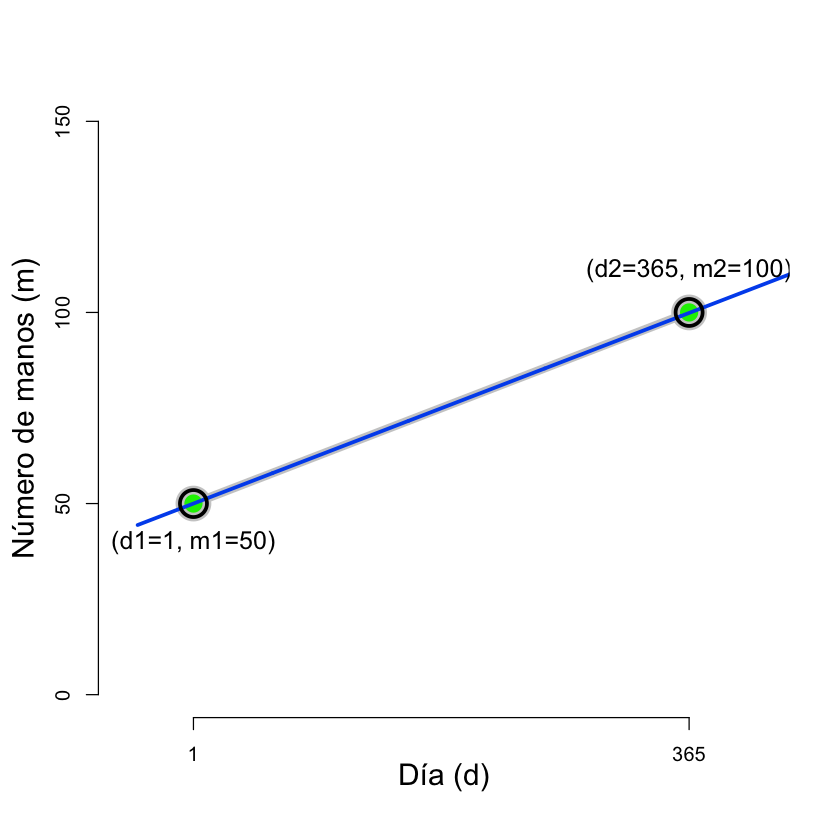

In [29]:
plot(x=c(1,365),y=c(50,100),
     xlim=c(-50,420),ylim=c(0,150),type='o',pch=21,cex=3,col='#cccccc',bg='#00ee00',lwd=7,
     axes=F,ann=F)
# Evaluando la función recién calculada
d=-40:440
m=0.137*d+49.863
lines(d,m,lwd=3,col='#0055ee') # Grafica la función con una línea azul
points(x=c(1,365),y=c(50,100),cex=3,lwd=3)
axis(1,at=c(1,365));axis(2)
mtext('Día (d)',1,cex=1.5,line=2)
mtext('Número de manos (m)',2,cex=1.5,line=2.5)
text(365,100,'(d2=365, m2=100)',cex=1.25,adj=c(0.5,-2))
text(1,50,'(d1=1, m1=50)',cex=1.25,adj=c(0.5,2.5))

Si examinamos el resultado en el objeto `m` lo más probable es encontrar cantidades decimales:

In [ ]:
m

Desde luego, no es posible utilizar estos valores en la simulación porque `m` representa la cantidad de manos por noche, un número entero. Sin embargo, podemos redondear este vector, y examinar gráficamente el resultado del redondeo para tener una idea clara de la función "real" a simular:

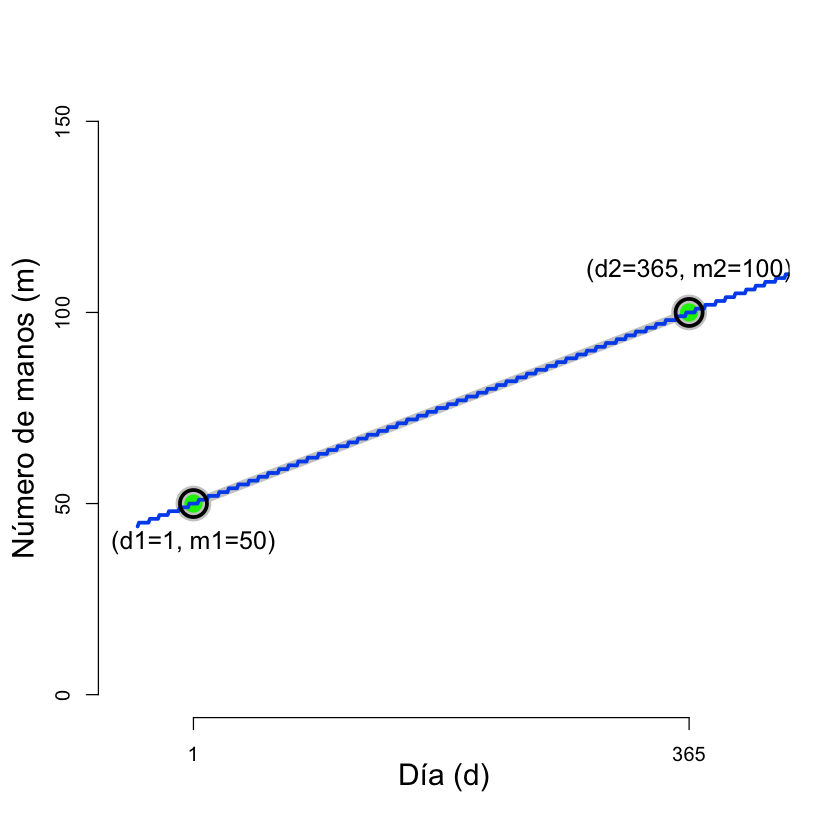

In [30]:
plot(x=c(1,365),y=c(50,100),
     xlim=c(-50,420),ylim=c(0,150),type='o',pch=21,cex=3,col='#cccccc',bg='#00ee00',lwd=7,
     axes=F,ann=F)
# Evaluando la función recién calculada
d=-40:440
m=0.137*d+49.863
lines(d,round(m),lwd=3,col='#0055ee') # Grafica la función con una línea punteada azul
points(x=c(1,365),y=c(50,100),cex=3,lwd=3)
axis(1,at=c(1,365));axis(2)
mtext('Día (d)',1,cex=1.5,line=2)
mtext('Número de manos (m)',2,cex=1.5,line=2.5)
text(365,100,'(d2=365, m2=100)',cex=1.25,adj=c(0.5,-2))
text(1,50,'(d1=1, m1=50)',cex=1.25,adj=c(0.5,2.5))

Con lo cual tenemos una idea aproximada, al menos visualmente, del tamaño del efecto del redondeo respecto de otros parámetros y escalas (días del año y número de manos) de la simulación.

Incluyendo estas modificaciones en la simulación final:

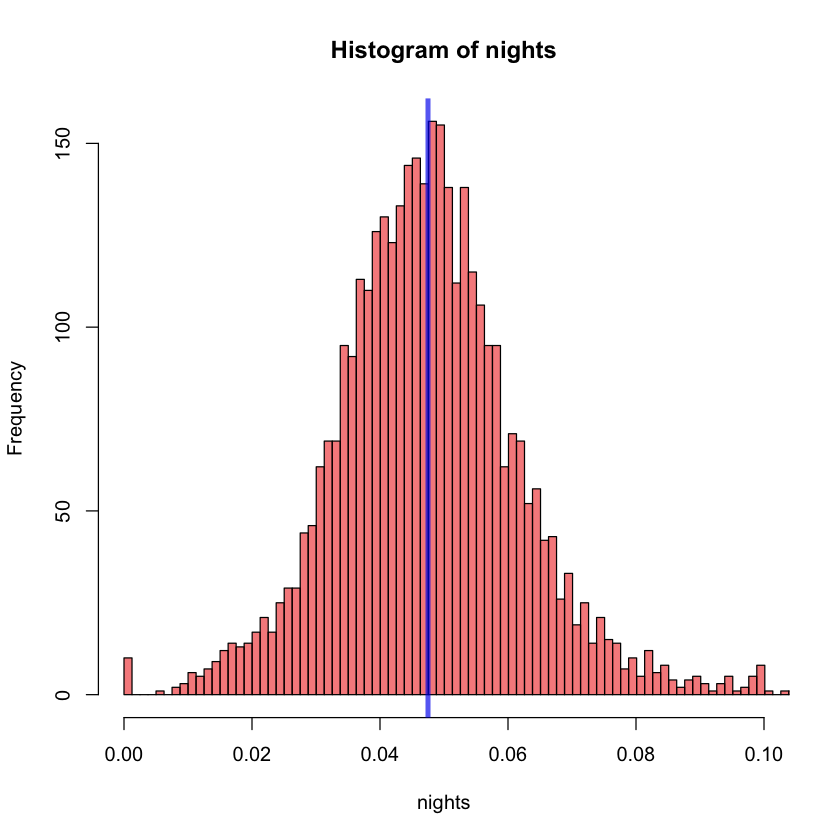

In [31]:
cartas <- c('A','K','Q','J','10',
            '9','8','7','6','5',
            '4','3','2') # Trece cartas por figura (digamos tréboles)
baraja <- c(cartas,cartas,cartas,cartas) # Cuatro figuras por bajara (tréboles, corazones, diamantes, espadas)
super_baraja <- c(baraja,baraja,baraja,baraja) # Cuatro barajas mezcladas

#super_baraja <- super_baraja[-c(6,7,8,9)] # Elimina las posiciones 6 a 9 en la súper baraja, que corresponden con cartas con número.

nights <- NULL # Este objeto guardará la proporción de blckjcks registrada cada noche
for(d in 1:3650){
    nights[d] <- casino_night(round(0.137*d+49.863)) # La cantidad de manos por noche es función lineal del día del año
}
hist(nights,xlim=c(0,0.1),breaks=seq(0,1,length.out = 800),col='#ee000088')
abline(v=0.0475,col='#0000eeaa',lwd=4)

In [33]:
round(0.137*3650+49.863)

[1] 550

En esta simulación extendimos hasta diez años para apreciar las consecuencias a largo plazo del modelo lineal. La función garantiza que el conteo de manos en el primer día y en el último día del primer año son 50 y 100, respectivamente, pero también nos permite responder _¿qué pasa si el número de manos continúa aumentando 0.137 manos por noche, durante diez años?_ 

Siempre es recomendable examinar el comportamiento de los modelos y simulaciones en escenarios extremos, con la intención de comprender mejor la relación entre ambos antes de correr un experimento o procedimientos de inferencia sobre cierto modelo probabilístico. En este caso, por ejemplo, cuando examinamos cómo se mueve la proporción de blackjacks si el número de manos aumenta cierta constante por noche, conseguimos el siguiente diagrama de dispersión que, además de mostrar la reducción esperada en la varianza de proporciones, y mostrar que la media de las mismas tiende hacia la solución teórica, también muestra algunos patrones interesantes en dichas proporciones. ¿A qué crees que se deben?

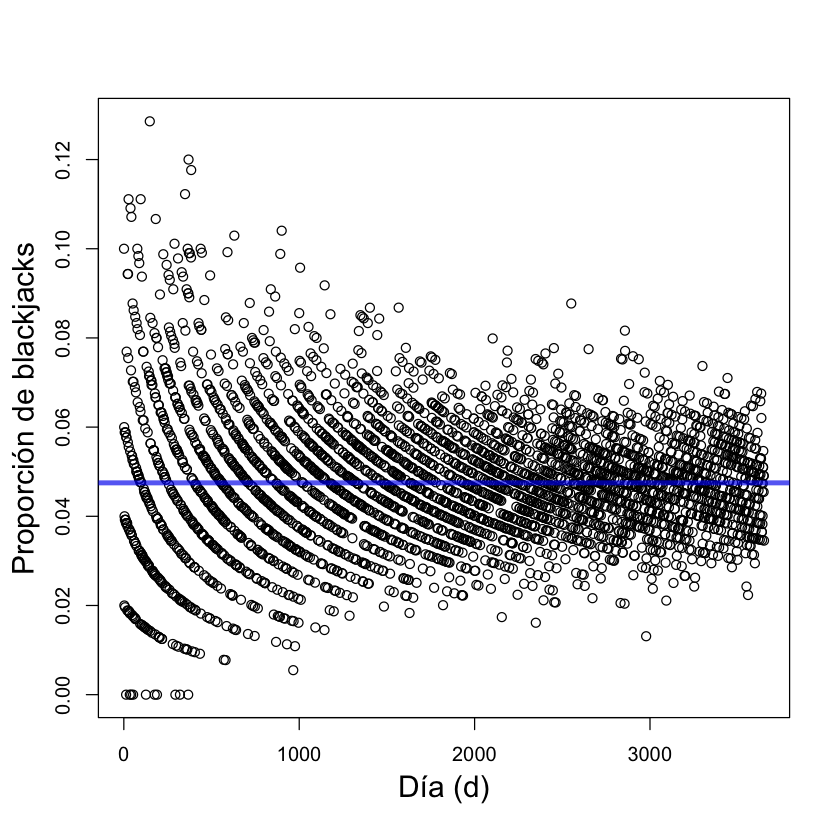

In [32]:
plot(1:3650,nights,ann=F)
abline(h=0.0475,col='#0000eeaa',lwd=4)
mtext('Día (d)',1,cex=1.5,line=2.5)
mtext('Proporción de blackjacks',2,cex=1.5,line=2.5)